## ExRx inclusion network: core-periphery detection with cpnet

November, 2022

Author: Yuanxi Fu

Use **cpnet** (Kojaku, S. (2022). A Python package for detecting core-periphery structure in networks [Python]. https://github.com/skojaku/core-periphery-detection (Original work published 2020))

Use one input file "inclusion_net_"


In [1]:
import networkx as nx
import cpnet
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
raw_edge_list = pd.read_csv("inclusion_net_edges.csv")
raw_edge_list.head()

,citing_id,cited_id,citing_doi,cited_doi_or_author_year,included_in_meta-analysis
0,1,220,10.2174/1745017901309010125,10.1111/j.1532-5415.2011.03454.x,NaN
1,1,212,10.2174/1745017901309010125,10.1111/j.1532-5415.2011.03319.x,NaN
2,1,192,10.2174/1745017901309010125,10.1370/afm.1093,NaN
3,1,133,10.2174/1745017901309010125,10.1186/1471-2318-6-18,NaN
4,1,112,10.2174/1745017901309010125,10.1093/gerona/60.6.768,NaN


In [3]:
edge_list = raw_edge_list[['citing_id', 'cited_id']]

In [4]:
G = nx.from_pandas_edgelist(df = edge_list, source = 'citing_id', target = 'cited_id')

In [5]:
# get connected components
largest_cc = max(nx.connected_components(G), key=len)
largest_cc_l = list(largest_cc)

In [36]:
sum([x <= 28 for x in largest_cc_l]) # SRRs in the major connected component

24

In [37]:
sum([x > 28 for x in largest_cc_l]) # PSRs in the major connected component

270

In [6]:
S = G.subgraph(largest_cc_l)

In [7]:
# create a layout 
layout = nx.kamada_kawai_layout(S)

### cpnet.BE()
**Significant**: Yes  
**SRR nodes determined as core nodes**: [2, 8, 9, 10, 12, 16, 21, 22, 25]  
**SRR nodes determined as periphery nodes**: [1, 4, 5, 6, 11, 13, 14, 15, 17, 18, 19, 20, 24, 27, 28]

In [41]:
# significant
algorithm = cpnet.BE()
algorithm.detect(S)
c = algorithm.get_pair_id()
x = algorithm.get_coreness()

In [42]:
# print out id where the value is 1 in x
# this is the core nodes
core_nodes = []
for k in x:
    if x[k]:
        core_nodes.append(k)
print(core_nodes)

[2, 8, 9, 10, 12, 16, 21, 22, 25]


In [42]:
# print periphery SRR nodes
peri_srr = []
for k in x:
    if x[k] == 0 and k <= 28:
        peri_srr.append(k)
        
print(peri_srr)

[1, 4, 5, 6, 11, 13, 14, 15, 17, 18, 19, 20, 24, 27, 28]


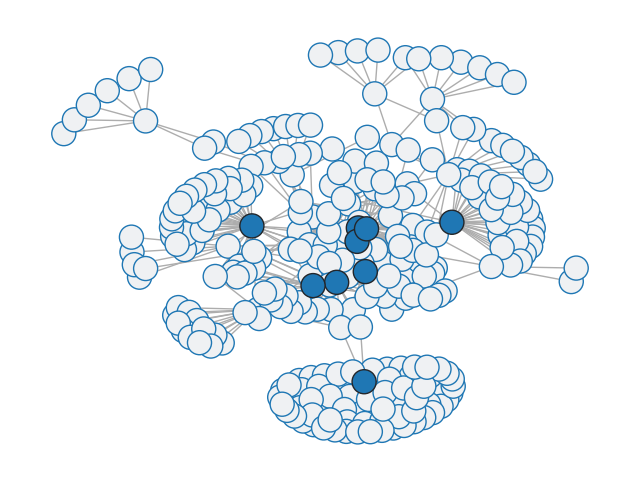

In [43]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(S, c, x, ax, pos=layout)

In [11]:
# statistical testing
sig_c, sig_x, significant, p_values = cpnet.qstest(c, x, S, algorithm, significance_level = 0.05, num_of_thread = 4)

C:\Users\yuanx\anaconda3\envs\QSS\lib\site-packages\cpnet\qstest.py:94: UserWarning: 'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.
  warnings.warn("'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.")
C:\Users\yuanx\anaconda3\envs\QSS\lib\site-packages\cpnet\qstest.py:96: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)
C:\Users\yuanx\anaconda3\envs\QSS\lib\site-packages\cpnet\utils.py:20: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  sparse.csr_matrix(nx.adjacency_matrix(net), dtype=np.float64),
  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\yuanx\anaconda3\envs\QSS\lib\site-packages\cpnet\qstest.py:35: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  Ar = sparse.csr_matrix(nx.ad

In [12]:
significant

[True]

### cpnet.MINRES()
**Significant**: No

In [13]:
algorithm = cpnet.MINRES()
algorithm.detect(S)
c = algorithm.get_pair_id()
x = algorithm.get_coreness()

In [ ]:
sig_c, sig_x, significant, p_values = cpnet.qstest(c, x, S, algorithm, significance_level = 0.05, num_of_thread = 4)
significant

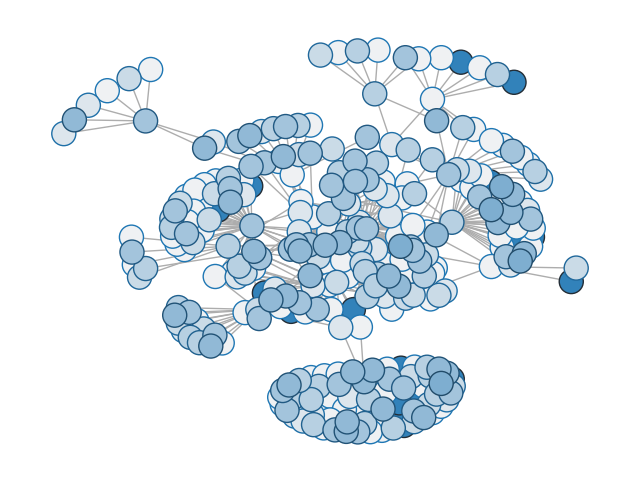

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(S, c, x, ax, pos=layout)

### cpnet.Lip()
**Significant**: No

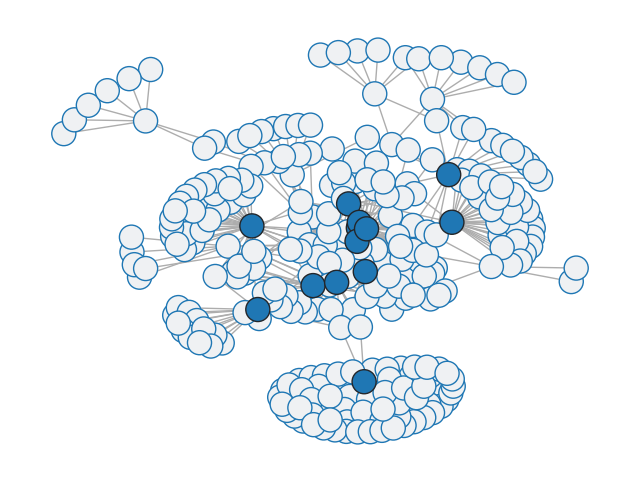

In [15]:
algorithm = cpnet.Lip()
algorithm.detect(S)
c = algorithm.get_pair_id()
x = algorithm.get_coreness()
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(S, c, x, ax, pos=layout)

In [ ]:
sig_c, sig_x, significant, p_values = cpnet.qstest(c, x, S, algorithm, significance_level = 0.05, num_of_thread = 4)
significant

### cpnet.Divisive()
**significant**: No

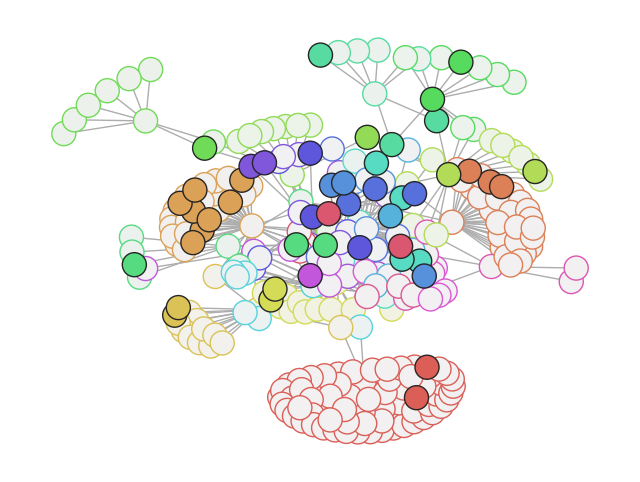

In [16]:
algorithm = cpnet.Divisive()
algorithm.detect(S)
c = algorithm.get_pair_id()
x = algorithm.get_coreness()
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(S, c, x, ax, pos=layout)

In [ ]:
sig_c, sig_x, significant, p_values = cpnet.qstest(c, x, S, algorithm, significance_level = 0.05, num_of_thread = 4)
significant

### cpnet.Surprise()
**Significant**: Yes  
**SRR nodes determined as core nodes**: [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28]  
**SRR nodes determined as periphery nodes**: []

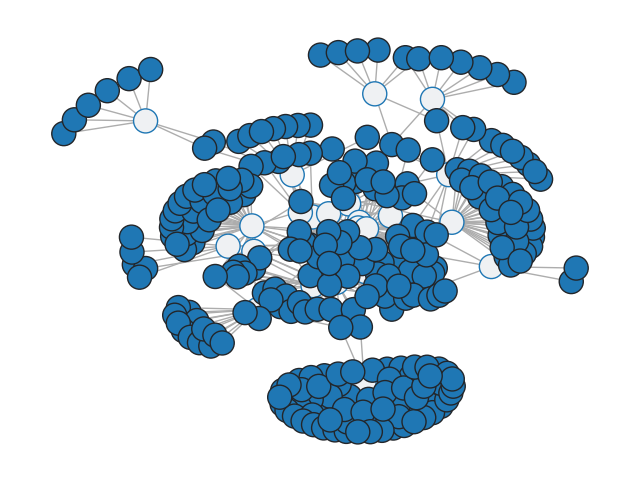

In [30]:
algorithm = cpnet.Surprise()
algorithm.detect(S)
c = algorithm.get_pair_id()
x = algorithm.get_coreness()
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(S, c, x, ax, pos=layout)

In [32]:
# print out id where the value is 1 in x
core_nodes = []
for k in x:
    if x[k] and k <= 28:
        core_nodes.append(k)
print(core_nodes)

[]


In [33]:
# print periphery SRR nodes
peri_srr = []
for k in x:
    if x[k] == 0 and k <= 28:
        peri_srr.append(k)    
print(peri_srr)

[1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28]


In [ ]:
sig_c, sig_x, significant, p_values = cpnet.qstest(c, x, S, algorithm, significance_level = 0.05, num_of_thread = 4)
significant

### cpnet.KM_config()
**Significant**: No

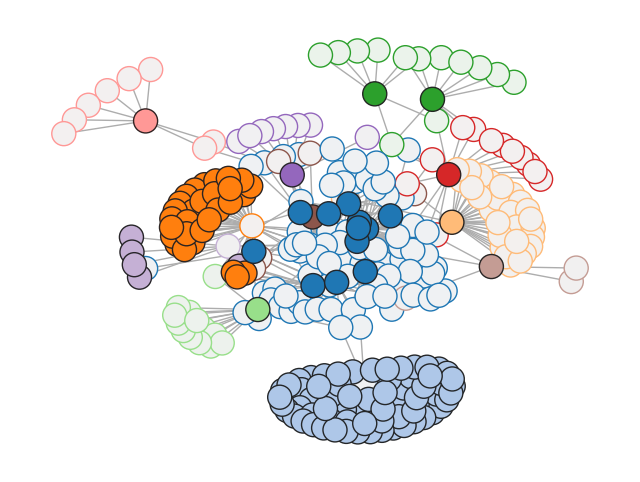

In [18]:
algorithm = cpnet.KM_config()
algorithm.detect(S)
c = algorithm.get_pair_id()
x = algorithm.get_coreness()
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(S, c, x, ax, pos=layout)

In [ ]:
sig_c, sig_x, significant, p_values = cpnet.qstest(c, x, S, algorithm, significance_level = 0.05, num_of_thread = 4)
significant

### cpnet.Rossa()
**Significant**: Yes  
**SRR nodes determined as core nodes**: 2, 8, 9, 10, 12, 16, 21, 22, 25  
**SRR nodes determined as periphery nodes**: 1, 4, 5, 6, 11, 13, 14, 15, 17, 18, 19, 20, 24, 27, 28

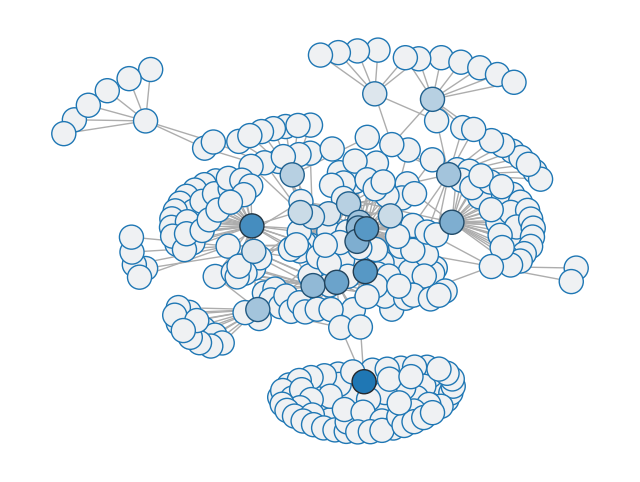

In [51]:
# Significant
algorithm = cpnet.Rossa()
algorithm.detect(S)
c = algorithm.get_pair_id()
x = algorithm.get_coreness()
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(S, c, x, ax, pos=layout)

In [ ]:
sig_c, sig_x, significant, p_values = cpnet.qstest(c, x, S, algorithm, significance_level = 0.05, num_of_thread = 4)
significant

In [52]:
# print out id where the value is 1 in x
# set the threshold for coreness
threshold = 0.5

core_nodes = []
for k in x:
    if x[k] >= threshold and k<=28:
        core_nodes.append(k)
print(core_nodes)

[2, 8, 9, 10, 12, 16, 21, 22, 25]


In [49]:
# print periphery SRR nodes
peri_srr = []
for k in x:
    if x[k] < threshold and k <= 28:
        peri_srr.append(k)    
print(peri_srr)

[1, 4, 5, 6, 11, 13, 14, 15, 17, 18, 19, 20, 24, 27, 28]


In [50]:
# print core PSR nodes
core_psr = []
for k in x:
    if x[k] >= threshold and k > 28:
        peri_psr.append(k)    
print(core_psr)

[]


### cpnet.Rmbach()
**Significant**: No

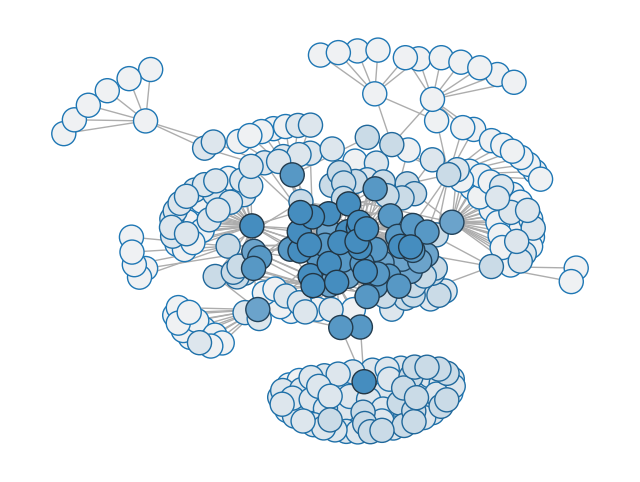

In [20]:
algorithm = cpnet.Rombach()
algorithm.detect(S)
c = algorithm.get_pair_id()
x = algorithm.get_coreness()
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(S, c, x, ax, pos=layout)

In [ ]:
sig_c, sig_x, significant, p_values = cpnet.qstest(c, x, S, algorithm, significance_level = 0.05, num_of_thread = 4)
significant

### cpnet.LowRankCore()
**Significant**: False

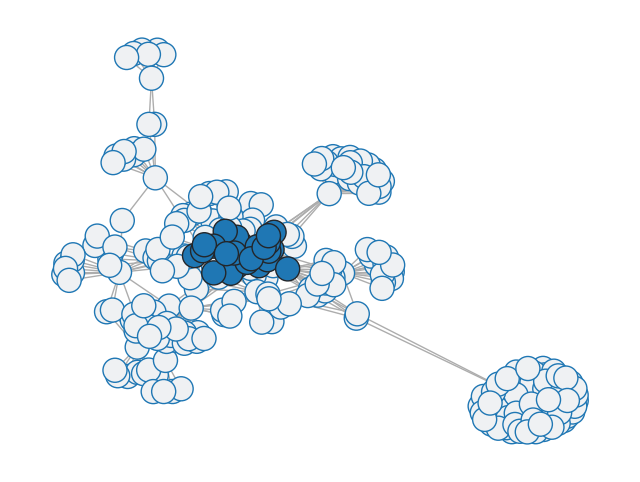

In [21]:
algorithm = cpnet.LowRankCore()
algorithm.detect(S)
c = algorithm.get_pair_id()
x = algorithm.get_coreness()
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(S, c, x, ax)

In [72]:
sig_c, sig_x, significant, p_values = cpnet.qstest(c, x, S, algorithm, significance_level = 0.05, num_of_thread = 4)
significant

100%|██████████| 100/100 [00:10<00:00,  9.90it/s]


[False]

### cpnet.LapCore()
**Significant**: False

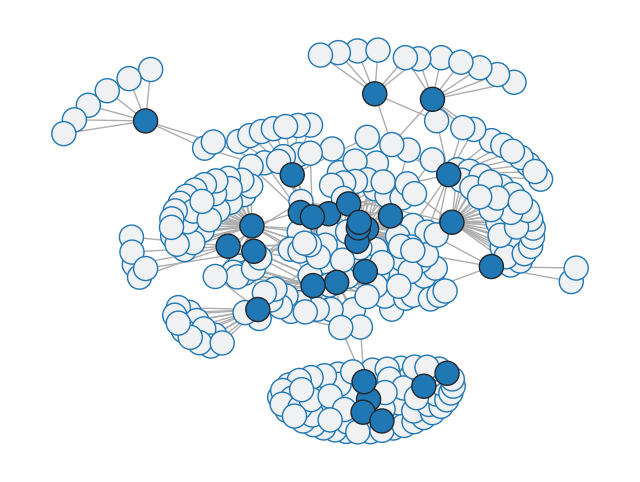

In [22]:
algorithm = cpnet.LapCore()
algorithm.detect(S)
c = algorithm.get_pair_id()
x = algorithm.get_coreness()
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(S, c, x, ax, pos=layout)

In [74]:
sig_c, sig_x, significant, p_values = cpnet.qstest(c, x, S, algorithm, significance_level = 0.05, num_of_thread = 4)
significant

100%|██████████| 100/100 [00:10<00:00,  9.32it/s]


[False]

### cpnet.LapSgnCore()
**Significant**: True  
**SRR nodes determined as core nodes**: 2, 8, 9, 10, 12, 16, 21, 22, 25  
**SRR nodes determined as periphery nodes**: 1, 4, 5, 6, 11, 13, 14, 15, 17, 18, 19, 20, 24, 27, 28

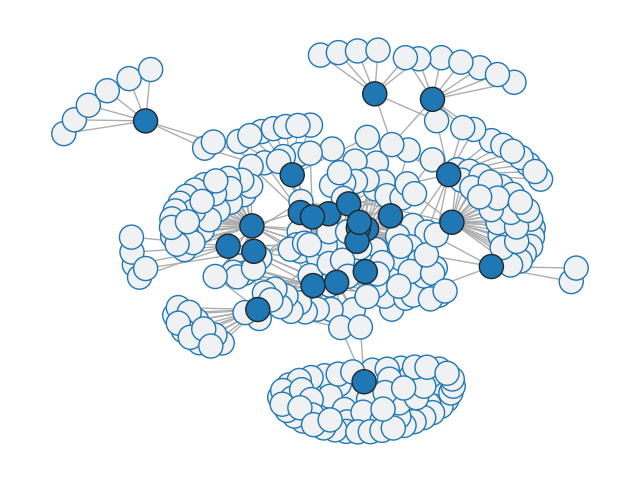

In [27]:
# significant -- but selected all SRR nodes as periphery and all PSR nodes as core
algorithm = cpnet.LapSgnCore()
algorithm.detect(S)
c = algorithm.get_pair_id()
x = algorithm.get_coreness()
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(S, c, x, ax, pos=layout)

In [76]:
sig_c, sig_x, significant, p_values = cpnet.qstest(c, x, S, algorithm, significance_level = 0.05, num_of_thread = 4)
significant

100%|██████████| 100/100 [00:01<00:00, 51.07it/s]


[True]

In [25]:
# print out id where the value is 1 in x
core_nodes = []
for k in x:
    if x[k]:
        core_nodes.append(k)
print(core_nodes)

[1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28]


In [29]:
# print periphery SRR nodes
peri_srr = []
for k in x:
    if x[k] == 0 and k <= 28:
        peri_srr.append(k)    
print(peri_srr)

[]
